### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%pip install jdatetime 
# install jdatetime library and import jdatetime for working on jalali dates
import jdatetime

### Getting information of Dataset

In [22]:
df = pd.read_csv("Stores_Transactions.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8192 non-null   int64  
 1   transaction_id    8192 non-null   int64  
 2   transaction_date  8192 non-null   object 
 3   transaction_time  8192 non-null   object 
 4   store             8192 non-null   object 
 5   product_name      8192 non-null   object 
 6   quantity          8192 non-null   int64  
 7   unit_price        8192 non-null   float64
 8   total_price       8192 non-null   float64
 9   total_amount      8192 non-null   float64
 10  total_items       8192 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 704.1+ KB


In [6]:
df.head(3)

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2


## Exploring Data
- ### Data preprocessing (Converting Objects)

In [5]:
# finding object types
df.dtypes

user_id               int64
transaction_id        int64
transaction_date     object
transaction_time     object
store                object
product_name         object
quantity              int64
unit_price          float64
total_price         float64
total_amount        float64
total_items           int64
dtype: object

In [447]:
df.select_dtypes('object').columns

Index(['transaction_date', 'transaction_time', 'store', 'product_name'], dtype='object')

In [453]:
# checking for null values
df.isna().sum()

user_id             0
transaction_id      0
transaction_date    0
transaction_time    0
store               0
product_name        0
quantity            0
unit_price          0
total_price         0
total_amount        0
total_items         0
geregorian_dates    0
dtype: int64

In [454]:
# getting more information from datasset
df.describe()

,user_id,transaction_id,quantity,unit_price,total_price,total_amount,total_items
count,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8.192000e+03,8192.000000
mean,6.557617,161.153320,2.965576,2.170055e+06,3.426030e+06,6.339663e+06,8.775513
std,3.468765,93.056739,3.949849,6.191959e+06,9.584929e+06,1.393022e+07,9.698697
min,1.000000,1.000000,1.000000,5.013100e+03,5.035480e+03,7.839930e+03,1.000000
25%,4.000000,81.000000,1.000000,8.416818e+04,1.853002e+05,8.157042e+05,3.000000
50%,7.000000,161.000000,2.000000,2.872106e+05,5.467666e+05,1.944458e+06,5.000000
75%,10.000000,242.000000,3.000000,9.350427e+05,1.939030e+06,4.701880e+06,10.000000
max,12.000000,348.000000,48.000000,4.999451e+07,1.406411e+08,1.406411e+08,50.000000


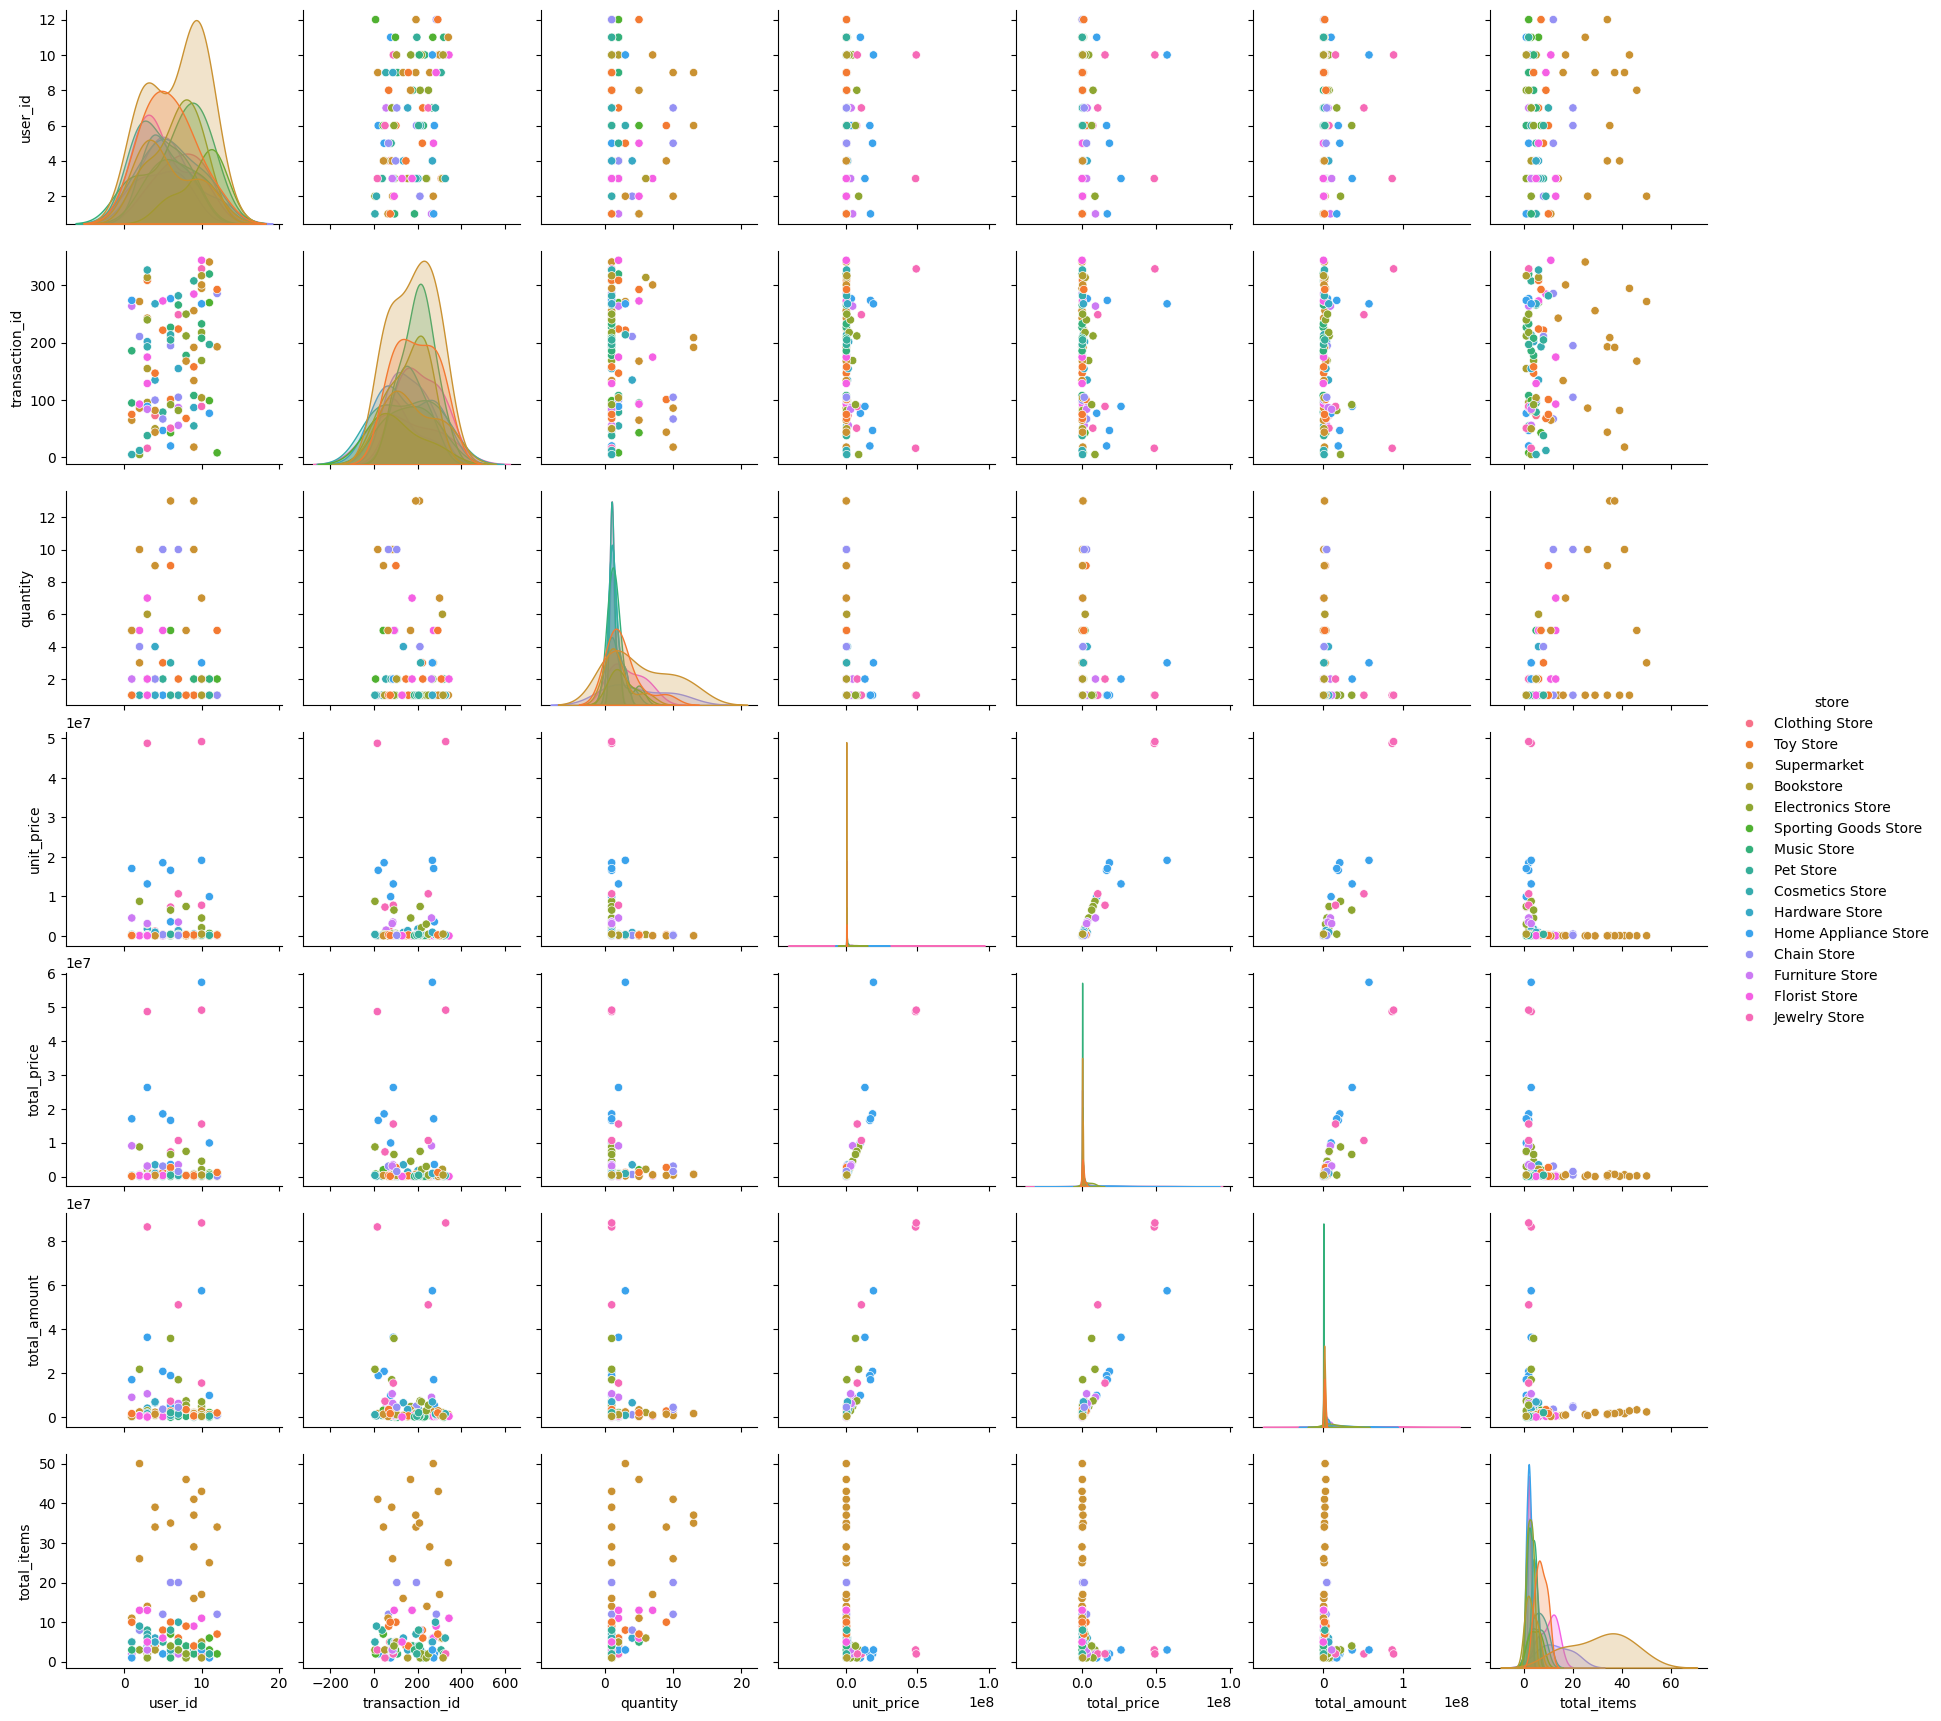

In [7]:
# getting info
sns.pairplot(
    data=df.sample(100),
    hue= 'store'
)

In [23]:
# function to convert Jalali to Gregorian
def jalali_to_gregorian(jdate):
    try:
        jyear, jmonth, jday = map(int, jdate.split('-'))
        return jdatetime.date(jyear, jmonth, jday).togregorian()
    except ValueError as e:
        return pd.NaT # handle invalid dates

# make new column as geregorian_dates
df['geregorian_dates'] = df['transaction_date'].apply(jalali_to_gregorian)    

from dateutil.parser import parse

df.head()

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,geregorian_dates
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,2024-03-20
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,2024-03-21
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,2024-03-22
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2,2024-03-22
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6,2024-03-23


In [9]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['geregorian_dates'] = pd.to_datetime(df['geregorian_dates'])
df['store'] = df['store'].astype('string')
df['product_name'] = df['product_name'].astype('string')

# Drop transaction_date cause of it is jalalis dates and we can not convert it to datetime type ( raised error 'out of bound' ) instead of we created geregorian_dates column
df = df.drop('transaction_date', axis=1)

/tmp/ipykernel_21427/3266729158.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_time'] = pd.to_datetime(df['transaction_time'])


In [12]:
# check types after converting
df.dtypes

user_id                      int64
transaction_id               int64
transaction_time    datetime64[ns]
store               string[python]
product_name        string[python]
quantity                     int64
unit_price                 float64
total_price                float64
total_amount               float64
total_items                  int64
geregorian_dates    datetime64[ns]
dtype: object

In [10]:
df.head(3)

,user_id,transaction_id,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,geregorian_dates
0,1,1,2025-02-22 23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,2024-03-20
1,1,2,2025-02-22 16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,2024-03-21
2,1,3,2025-02-22 07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,2024-03-22


- ### Finding the product which is the bestseller

In [15]:
# Calculate total quantity sold and total sales per product
bestsellers = df.groupby('product_name').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

# Sort by total quantity sold and total sales value
bestsellers_sorted = bestsellers.sort_values(by=['quantity', 'total_price'], ascending=False)

# Display top 5 bestselling products
top_bestsellers = bestsellers_sorted.head(5)
top_bestsellers

,product_name,quantity,total_price
1245,Supermarket Product 16,140,7191837.44
1287,Supermarket Product 35,132,8646736.35
1355,Supermarket Product 97,118,7011869.17
1220,Supermarket Product 137,117,5092035.43
1239,Supermarket Product 154,110,5146266.84


- ### Finding the bestseller store

In [16]:
# Filter dataset for top 10 bestselling products
top_products = top_bestsellers['product_name'].tolist()
df_bestsellers = df[df['product_name'].isin(top_products)]

# Group by store and product to get total quantity and sales per store
store_performance = df_bestsellers.groupby(['store', 'product_name']).agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

# Aggregate total sales per store for all bestsellers
store_total_sales = store_performance.groupby('store')['total_price'].sum().reset_index()
store_total_sales = store_total_sales.sort_values(by='total_price', ascending=False)

store_total_sales.head(5)  # Display top 5 performing stores


,store,total_price
0,Supermarket,33088745.23


- ### Visualizing top 5 bestselling products

/tmp/ipykernel_21427/2053899116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


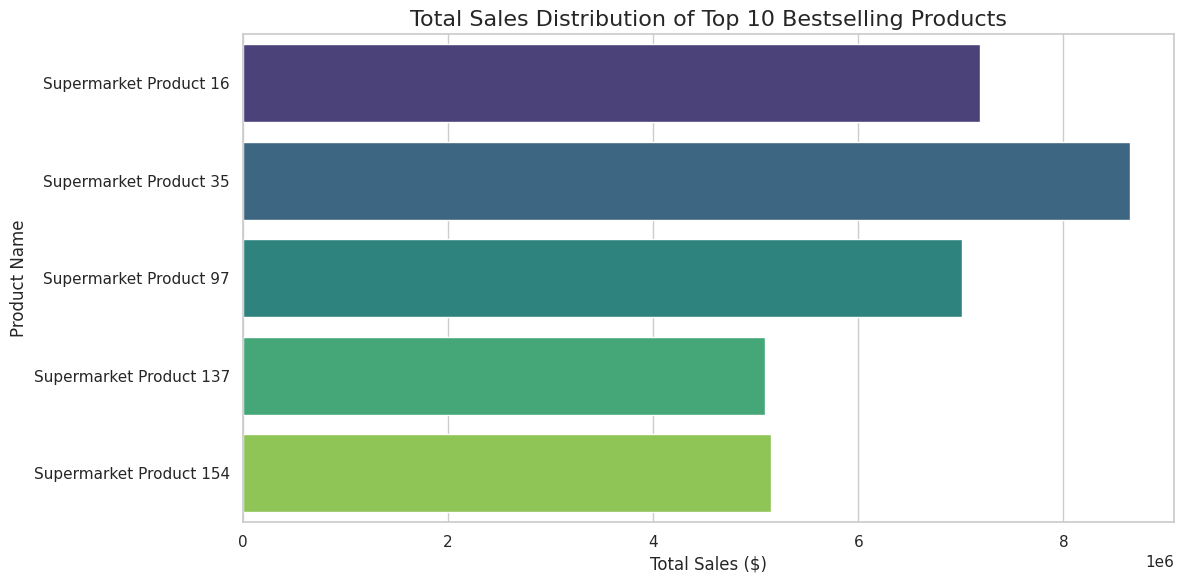

In [18]:

# Set the plot style
sns.set_theme(style="whitegrid")

# Plot total sales for top 10 bestselling products
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_bestsellers,
    x='total_price',
    y='product_name',
    palette='viridis'
)

plt.title('Total Sales Distribution of Top 10 Bestselling Products', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
df.head(3)

,user_id,transaction_id,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,geregorian_dates
0,1,1,2025-02-22 23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,2024-03-20
1,1,2,2025-02-22 16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,2024-03-21
2,1,3,2025-02-22 07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,2024-03-22
